In [45]:
import pandas as pd
from binance.client import Client
client=Client()

In [46]:
def getdata(symbol,start):
    frame=pd.DataFrame(client.get_historical_klines(symbol,"1h",start))
    frame=frame.iloc[:,:6]
    frame.columns=["Time","Open","High","Low","Close","Volume"]
    frame.set_index("Time",inplace=True)
    frame.index=pd.to_datetime(frame.index,unit="ms")
    frame=frame.astype(float)
    return frame

In [47]:
df=getdata("BTCUSDT","2023-01-01")

In [48]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909
...,...,...,...,...,...
2024-02-03 15:00:00,43042.28,43190.00,42880.00,43119.06,1304.09113
2024-02-03 16:00:00,43119.06,43186.77,43072.53,43095.04,620.63671
2024-02-03 17:00:00,43095.04,43270.00,43091.10,43230.01,842.36557


In [49]:
df["price"]=df.Open.shift(-1)

In [50]:
df

,Open,High,Low,Close,Volume,price
Time,,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570,16529.59
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669,16551.47
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,16548.19
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,16533.04
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,16522.22
...,...,...,...,...,...,...
2024-02-03 15:00:00,43042.28,43190.00,42880.00,43119.06,1304.09113,43119.06
2024-02-03 16:00:00,43119.06,43186.77,43072.53,43095.04,620.63671,43095.04
2024-02-03 17:00:00,43095.04,43270.00,43091.10,43230.01,842.36557,43230.00


In [51]:
df["ret"]=df.Close.pct_change()

In [52]:
df

,Open,High,Low,Close,Volume,price,ret
Time,,,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570,16529.59,NaN
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669,16551.47,0.001319
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,16548.19,-0.000198
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,16533.04,-0.000916
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,16522.22,-0.000677
...,...,...,...,...,...,...,...
2024-02-03 15:00:00,43042.28,43190.00,42880.00,43119.06,1304.09113,43119.06,0.001784
2024-02-03 16:00:00,43119.06,43186.77,43072.53,43095.04,620.63671,43095.04,-0.000557
2024-02-03 17:00:00,43095.04,43270.00,43091.10,43230.01,842.36557,43230.00,0.003132


In [53]:
def trail(df,entry,dist):
    

    profits=[]
    in_position=False

    for index,row in df.iterrows():
        if not in_position and row.ret > entry:
            buyprice=row.price
            in_position=True
            trailing_stop=buyprice*dist
        if in_position:
            if row.Close * dist >= trailing_stop:
                trailing_stop =row.Close * dist
            if row.Close <= trailing_stop:
                sellprice=row.price
                profit=(sellprice-buyprice)/buyprice - 0.0015
                profits.append(profit)
                in_position=False
    return (pd.Series(profits)+1).cumprod()

In [54]:
trail(df,0.01,0.94)

0     1.253543
1     1.323240
2     1.278414
3     1.203724
4     1.435521
5     1.533478
6     1.499155
7     1.608763
8     1.601131
9     1.566607
10    1.548554
11    1.466707
12    1.423791
13    1.393937
14    1.588911
15    1.513902
16    1.479599
17    1.529986
18    1.928518
19    2.224105
20    2.277888
21    2.403835
22    2.293070
23    2.162955
dtype: float64

<Axes: >

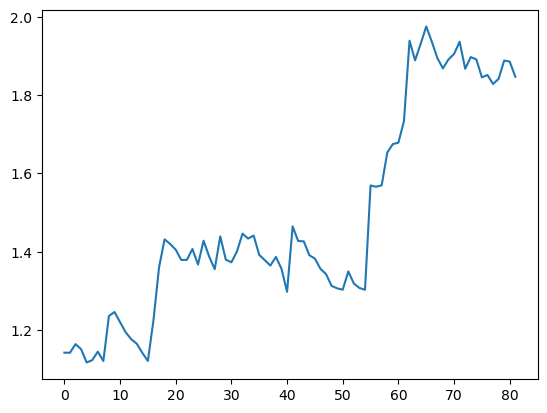

In [55]:
(pd.Series(profits)+1).cumprod().plot()

In [56]:
(pd.Series(profits)+1).prod()

1.8470690288140352

In [57]:
43070.25/16551.47

2.6022008921261977

In [58]:
len(profits)

82

In [59]:
df

,Open,High,Low,Close,Volume,price,ret
Time,,,,,,,
2023-01-01 00:00:00,16541.77,16545.70,16508.39,16529.67,4364.83570,16529.59,NaN
2023-01-01 01:00:00,16529.59,16556.80,16525.78,16551.47,3590.06669,16551.47,0.001319
2023-01-01 02:00:00,16551.47,16559.77,16538.14,16548.19,3318.84038,16548.19,-0.000198
2023-01-01 03:00:00,16548.19,16548.19,16518.21,16533.04,4242.08050,16533.04,-0.000916
2023-01-01 04:00:00,16533.04,16535.97,16511.92,16521.85,4285.00909,16522.22,-0.000677
...,...,...,...,...,...,...,...
2024-02-03 15:00:00,43042.28,43190.00,42880.00,43119.06,1304.09113,43119.06,0.001784
2024-02-03 16:00:00,43119.06,43186.77,43072.53,43095.04,620.63671,43095.04,-0.000557
2024-02-03 17:00:00,43095.04,43270.00,43091.10,43230.01,842.36557,43230.00,0.003132
